<a href="https://colab.research.google.com/github/ArtunKARA/MusicEmotionRecognition/blob/main/hubert_large_ls960_ft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basitleşrilmiş Kod (Veri Ekleme)

In [1]:
import os
import librosa
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, matthews_corrcoef
from transformers import Wav2Vec2Processor, HubertModel
import matplotlib.pyplot as plt
import pandas as pd

# Colab'da Google Drive'ı bağlama
from google.colab import drive
drive.mount('/content/drive')

# Yeni müzik türleri
agresif_dir = '/content/drive/My Drive/Music Data/Agresif'
huzunlu_dir = '/content/drive/My Drive/Music Data/Hüzünlü'
neseli_dir = '/content/drive/My Drive/Music Data/Neşeli'

# Müzik dosya yollarını oluşturma
agresif_paths = [os.path.join(agresif_dir, f) for f in os.listdir(agresif_dir)]
huzunlu_paths = [os.path.join(huzunlu_dir, f) for f in os.listdir(huzunlu_dir)]
neseli_paths = [os.path.join(neseli_dir, f) for f in os.listdir(neseli_dir)]
audio_files = agresif_paths + huzunlu_paths + neseli_paths
audio_labels = [0]*len(agresif_paths) + [1]*len(huzunlu_paths) + [2]*len(neseli_paths)

# HuBERT modelini yükleme
audio_processor = Wav2Vec2Processor.from_pretrained('facebook/hubert-large-ls960-ft')
hubert_model = HubertModel.from_pretrained('facebook/hubert-large-ls960-ft')

def extract_audio_features(audio_paths):
    features = []
    for path in audio_paths:
        audio_data, _ = librosa.load(path, sr=16000)
        inputs = audio_processor(audio_data, return_tensors='pt', sampling_rate=16000).input_values
        with torch.no_grad():
            outputs = hubert_model(inputs).last_hidden_state
        features.append(outputs.mean(dim=1).cpu().numpy())
        print(path)
    return np.vstack(features)

# train ve test olarak bölme
train_size = int(0.8 * len(audio_files))
train_files, test_files = audio_files[:train_size], audio_files[train_size:]
train_labels, test_labels = audio_labels[:train_size], audio_labels[train_size:]
train_features = extract_audio_features(train_files)
test_features = extract_audio_features(test_files)

# Tensor dönüşümleri
X_train_tensor = torch.tensor(train_features, dtype=torch.float32)
y_train_tensor = torch.tensor(train_labels, dtype=torch.long)
X_test_tensor = torch.tensor(test_features, dtype=torch.float32)
y_test_tensor = torch.tensor(test_labels, dtype=torch.long)




Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of HubertModel were not initialized from the model checkpoint at facebook/hubert-large-ls960-ft and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/Music Data/Agresif/Top 30 songs of Metallica (128kbit_AAC)_chunk218.wav
/content/drive/My Drive/Music Data/Agresif/Top 30 songs of Metallica (128kbit_AAC)_chunk210.wav
/content/drive/My Drive/Music Data/Agresif/Top 30 songs of Metallica (128kbit_AAC)_chunk138.wav
/content/drive/My Drive/Music Data/Agresif/Top 30 songs of Metallica (128kbit_AAC)_chunk268.wav
/content/drive/My Drive/Music Data/Agresif/Top 30 songs of Metallica (128kbit_AAC)_chunk190.wav
/content/drive/My Drive/Music Data/Agresif/Top 30 songs of Metallica (128kbit_AAC)_chunk160.wav
/content/drive/My Drive/Music Data/Agresif/Top 30 songs of Metallica (128kbit_AAC)_chunk194.wav
/content/drive/My Drive/Music Data/Agresif/Top 30 songs of Metallica (128kbit_AAC)_chunk258.wav
/content/drive/My Drive/Music Data/Agresif/Top 30 songs of Metallica (128kbit_AAC)_chunk140.wav
/content/drive/My Drive/Music Data/Agresif/Top 30 songs of Metallica (128kbit_AAC)_ch

Basitleşrilmiş Kod (Model)

Fold 1/5
Epoch [1/20], Train Loss: 1.0862, Val Loss: 1.0373
Epoch [2/20], Train Loss: 1.0365, Val Loss: 1.0121
Epoch [3/20], Train Loss: 1.0106, Val Loss: 1.0041
Epoch [4/20], Train Loss: 1.0017, Val Loss: 0.9970
Epoch [5/20], Train Loss: 0.9934, Val Loss: 0.9815
Epoch [6/20], Train Loss: 0.9767, Val Loss: 0.9624
Epoch [7/20], Train Loss: 0.9564, Val Loss: 0.9447
Epoch [8/20], Train Loss: 0.9377, Val Loss: 0.9295
Epoch [9/20], Train Loss: 0.9216, Val Loss: 0.9143
Epoch [10/20], Train Loss: 0.9051, Val Loss: 0.8991
Epoch [11/20], Train Loss: 0.8885, Val Loss: 0.8838
Epoch [12/20], Train Loss: 0.8721, Val Loss: 0.8703
Epoch [13/20], Train Loss: 0.8577, Val Loss: 0.8585
Epoch [14/20], Train Loss: 0.8449, Val Loss: 0.8481
Epoch [15/20], Train Loss: 0.8334, Val Loss: 0.8366
Epoch [16/20], Train Loss: 0.8216, Val Loss: 0.8247
Epoch [17/20], Train Loss: 0.8093, Val Loss: 0.8125
Epoch [18/20], Train Loss: 0.7966, Val Loss: 0.8000
Epoch [19/20], Train Loss: 0.7842, Val Loss: 0.7880
Epoch [20/20

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-2-ddd03b4ef611>:76: RuntimeWarning: invalid value encountered in divide
  sensitivities = true_positives / (true_positives + false_negatives)
<ipython-input-2-ddd03b4ef611>:77: RuntimeWarning: invalid value encountered in divide
  specificities = true_negatives / (true_negatives + false_positives)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/pyth

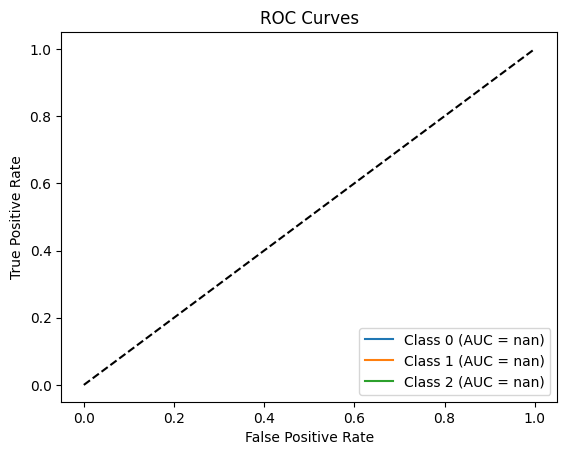

In [2]:
# Model tanımlama
class AudioClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(AudioClassifier, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.output_layer = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return self.output_layer(x)

# Model, loss ve optimizer
input_dim = X_train_tensor.shape[1]
output_dim = len(set(audio_labels))
audio_model = AudioClassifier(input_dim, output_dim)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(audio_model.parameters(), lr=0.001)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
num_epochs = 20

for fold, (train_index, val_index) in enumerate(kfold.split(X_train_tensor, y_train_tensor)):
    print(f'Fold {fold+1}/{kfold.n_splits}')

    X_fold_train = X_train_tensor[train_index]
    y_fold_train = y_train_tensor[train_index]
    X_fold_val = X_train_tensor[val_index]
    y_fold_val = y_train_tensor[val_index]

    for epoch in range(num_epochs):
        # Eğitim
        audio_model.train()
        optimizer.zero_grad()
        train_preds = audio_model(X_fold_train)
        train_loss = loss_fn(train_preds, y_fold_train)
        train_loss.backward()
        optimizer.step()

        # Doğrulama
        audio_model.eval()
        with torch.no_grad():
            val_preds = audio_model(X_fold_val)
            val_loss = loss_fn(val_preds, y_fold_val)

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss.item():.4f}, '
              f'Val Loss: {val_loss.item():.4f}')

# Test setinde modelin performansını değerlendirme
audio_model.eval()
with torch.no_grad():
    test_preds = audio_model(X_test_tensor)
    test_probs = torch.softmax(test_preds, dim=1).cpu().numpy()
    _, test_pred_labels = torch.max(test_preds, 1)
    test_acc = (test_pred_labels == y_test_tensor).float().mean().item()
    print(f'Test Accuracy: {test_acc:.4f}')

# Performans metriklerini hesaplama
acc = accuracy_score(y_test_tensor, test_pred_labels)
prec = precision_score(y_test_tensor, test_pred_labels, average='weighted')
rec = recall_score(y_test_tensor, test_pred_labels, average='weighted')
f1 = f1_score(y_test_tensor, test_pred_labels, average='weighted')
mcc = matthews_corrcoef(y_test_tensor, test_pred_labels)

conf_matrix = confusion_matrix(y_test_tensor, test_pred_labels)

true_positives = np.diag(conf_matrix)
false_positives = np.sum(conf_matrix, axis=0) - true_positives
false_negatives = np.sum(conf_matrix, axis=1) - true_positives
true_negatives = np.sum(conf_matrix) - (true_positives + false_positives + false_negatives)

# Sensitivity ve Specificity
sensitivities = true_positives / (true_positives + false_negatives)
specificities = true_negatives / (true_negatives + false_positives)

# AUC
roc_auc = {}
for i in range(output_dim):
    fpr, tpr, _ = roc_curve((y_test_tensor == i).cpu().numpy(), test_probs[:, i])
    roc_auc[i] = auc(fpr, tpr)

# Performans Metrikler
metrics = {
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1,
    'MCC': mcc,
    'Sensitivity': sensitivities.mean(),
    'Specificity': specificities.mean(),
    'AUC': np.mean(list(roc_auc.values()))
}
metrics_df = pd.DataFrame([metrics])
print(metrics_df)

# ROC Eğrileri
plt.figure()
for i in range(output_dim):
    fpr, tpr, _ = roc_curve((y_test_tensor == i).cpu().numpy(), test_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

WAV dosyalarını yükleme ve preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, auc, matthews_corrcoef
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Dosya yollarını belirleyin
base_dir = '/content/drive/MyDrive/Music Data/'
categories = ['Agresif', 'Hüzünlü', 'Neşeli']
sampling_rate = 16000

# WAV dosyalarını yükleme ve preprocessing
def load_data(base_dir, categories, sampling_rate):
    data = []
    labels = []
    max_length = 0

    # Önce tüm dosyaları yükleyip en uzun ses dosyasının boyutunu buluyoruz
    all_audio_files = []
    for label, category in enumerate(categories):
        folder_path = os.path.join(base_dir, category)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            audio, sr = librosa.load(file_path, sr=sampling_rate)
            all_audio_files.append((audio, label))
            if len(audio) > max_length:
                max_length = len(audio)

    # Verileri aynı uzunluğa getiriyoruz
    for audio, label in all_audio_files:
        if len(audio) < max_length:
            padding = max_length - len(audio)
            audio = np.pad(audio, (0, padding), 'constant')
        data.append(audio)
        labels.append(label)

    return np.array(data), np.array(labels)

data, labels = load_data(base_dir, categories, sampling_rate)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")




Mounted at /content/drive


HuBert Modelini yükleme ve eğitme

In [ ]:
# (Burada HuBert modelinin nasıl eğitileceği ve kullanılacağı detaylandırılmalıdır. Örneğin, transformers kütüphanesi kullanılabilir.)
from transformers import Wav2Vec2Processor, HubertForSequenceClassification
import torch

processor = Wav2Vec2Processor.from_pretrained("facebook/hubert-large-ls960-ft")
model = HubertForSequenceClassification.from_pretrained("facebook/hubert-large-ls960-ft", num_labels=len(categories))

# Verileri dönüştürme
def preprocess(data):
    inputs = processor(data, sampling_rate=sampling_rate, return_tensors="pt", padding=True)
    return inputs

train_inputs = preprocess(X_train.tolist())
test_inputs = preprocess(X_test.tolist())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at facebook/hubert-large-ls960-ft and are newly initialized: ['classifier.bias', 'classifier.weight', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and in

Eğitim

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Eğitim döngüsü
num_epochs = 5
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(**train_inputs).logits
    loss = loss_fn(outputs, torch.tensor(y_train))
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        outputs = model(**test_inputs).logits
        loss = loss_fn(outputs, torch.tensor(y_test))
        test_losses.append(loss.item())

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}")

# Modelin ezberlemediğini kanıtlamak için loss vs epoch grafiği
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
  Dosya: /content/drive/MyDrive/Music Data/Hüzünlü/çok eskiden rastlaşacaktık _ playlist (128kbit_AAC)_chunk30.wav
  Dosya: /content/drive/MyDrive/Music Data/Hüzünlü/çok eskiden rastlaşacaktık _ playlist (128kbit_AAC)_chunk39.wav
  Dosya: /content/drive/MyDrive/Music Data/Hüzünlü/çok eskiden rastlaşacaktık _ playlist (128kbit_AAC)_chunk18.wav
  Dosya: /content/drive/MyDrive/Music Data/Hüzünlü/çok eskiden rastlaşacaktık _ playlist (128kbit_AAC)_chunk14.wav
  Dosya: /content/drive/MyDrive/Music Data/Hüzünlü/çok eskiden rastlaşacaktık _ playlist (128kbit_AAC)_chunk12.wav
  Dosya: /content/drive/MyDrive/Music Data/Hüzünlü/çok eskiden rastlaşacaktık _ playlist (128kbit_AAC)_chunk50.wav
  Dosya: /content/drive/MyDrive/Music Data/Hüzünlü/çok eskiden rastlaşacaktık _ playlist (128kbit_AAC)_chunk46.wav
  Dosya: /content/drive/MyDrive/Music Data/Hüzünlü/çok eskiden rastlaşacaktık _ playlist (128kbit_AAC)_chunk24.wav
  Dosya: /con

Modeli değerlendirme

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(**test_inputs).logits
    predictions = torch.argmax(test_outputs, dim=1).numpy()

accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
mcc = matthews_corrcoef(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# ROC ve AUC hesaplama
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, predictions == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrisi çizme
for i in range(len(categories)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {categories[i]}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {categories[i]}')
    plt.legend(loc="lower right")
    plt.show()

# Sonuçları raporlama
results = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Recall', 'Precision', 'MCC'],
    'Score': [accuracy, f1, recall, precision, mcc]
})
print(results)

# Cross-validation uygulama
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = []

for train_index, val_index in kf.split(data):
    X_train_fold, X_val_fold = data[train_index], data[val_index]
    y_train_fold, y_val_fold = labels[train_index], labels[val_index]

    train_inputs_fold = preprocess(X_train_fold.tolist())
    val_inputs_fold = preprocess(X_val_fold.tolist())

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(**train_inputs_fold).logits
        loss = loss_fn(outputs, torch.tensor(y_train_fold))
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(**val_inputs_fold).logits
        val_predictions = torch.argmax(val_outputs, dim=1).numpy()

    accuracy_fold = accuracy_score(y_val_fold, val_predictions)
    cross_val_scores.append(accuracy_fold)

print(f"Cross-validation accuracy scores: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cross_val_scores)}")